<a href="https://colab.research.google.com/github/sureshcrwr/Mini-Projects/blob/main/Inroduction_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN)

This tutorial demonstrates training a simple [Convolutional Neural Network](CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html).

### Import TensorFlow

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Downloading and preparing dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 3s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


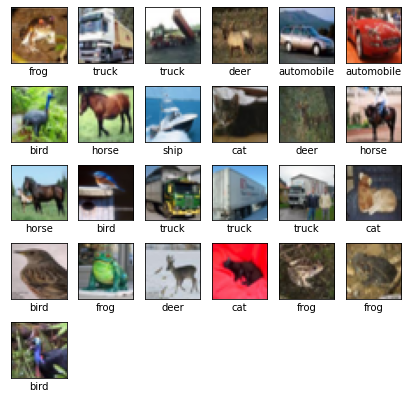

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='relu'))

Here's the complete architecture of your model:

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 23s 9ms/step - loss: 1.8958 - accuracy: 0.3525 - val_loss: 1.7231 - val_accuracy: 0.4226
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6501 - accuracy: 0.4480 - val_loss: 1.6194 - val_accuracy: 0.4558
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5389 - accuracy: 0.4796 - val_loss: 1.5167 - val_accuracy: 0.4882
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4643 - accuracy: 0.5004 - val_loss: 1.4780 - val_accuracy: 0.4980
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4027 - accuracy: 0.5169 - val_loss: 1.4969 - val_accuracy: 0.4924
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3541 - accuracy: 0.5281 - val_loss: 1.4217 - val_accuracy: 0.5107
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3130 - accuracy: 0.5406 - val_loss: 1.4285 - val_ac

### Evaluate the model

313/313 - 1s - loss: 1.4283 - accuracy: 0.5137 - 1s/epoch - 4ms/step


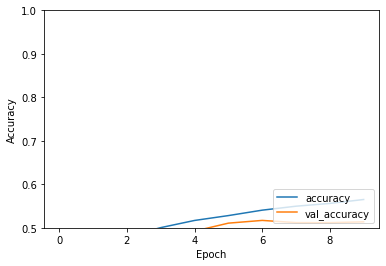

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [10]:
print(test_acc)

0.513700008392334


Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code!

## **Predicting the class of an image**

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


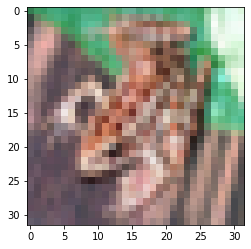

array([[0.       , 0.       , 0.       , 1.0238249, 0.       , 3.670308 ,
        3.3566985, 0.       , 0.       , 0.       ]], dtype=float32)

In [12]:
from tensorflow.keras.preprocessing import image
plt.imshow(test_images[95])
plt.show()
model.predict(test_images[95].reshape(1,32,32,3))